# EDSA Sendy Logistics Challenge
© Explore Data Science Academy

Data is a critical component to help Sendy create more secure, open and affordable solutions. Can we use historical data to estimate a precise time for the rider's arrival at the destination of a shipment, given the specifics of a Sendy order?

To do this we’re challenged  to build a model that predicts an accurate delivery time, from picking up a package to arriving at the final destination. An accurate arrival time prediction will help all businesses to improve their logistics and communicate an accurate time to their customers




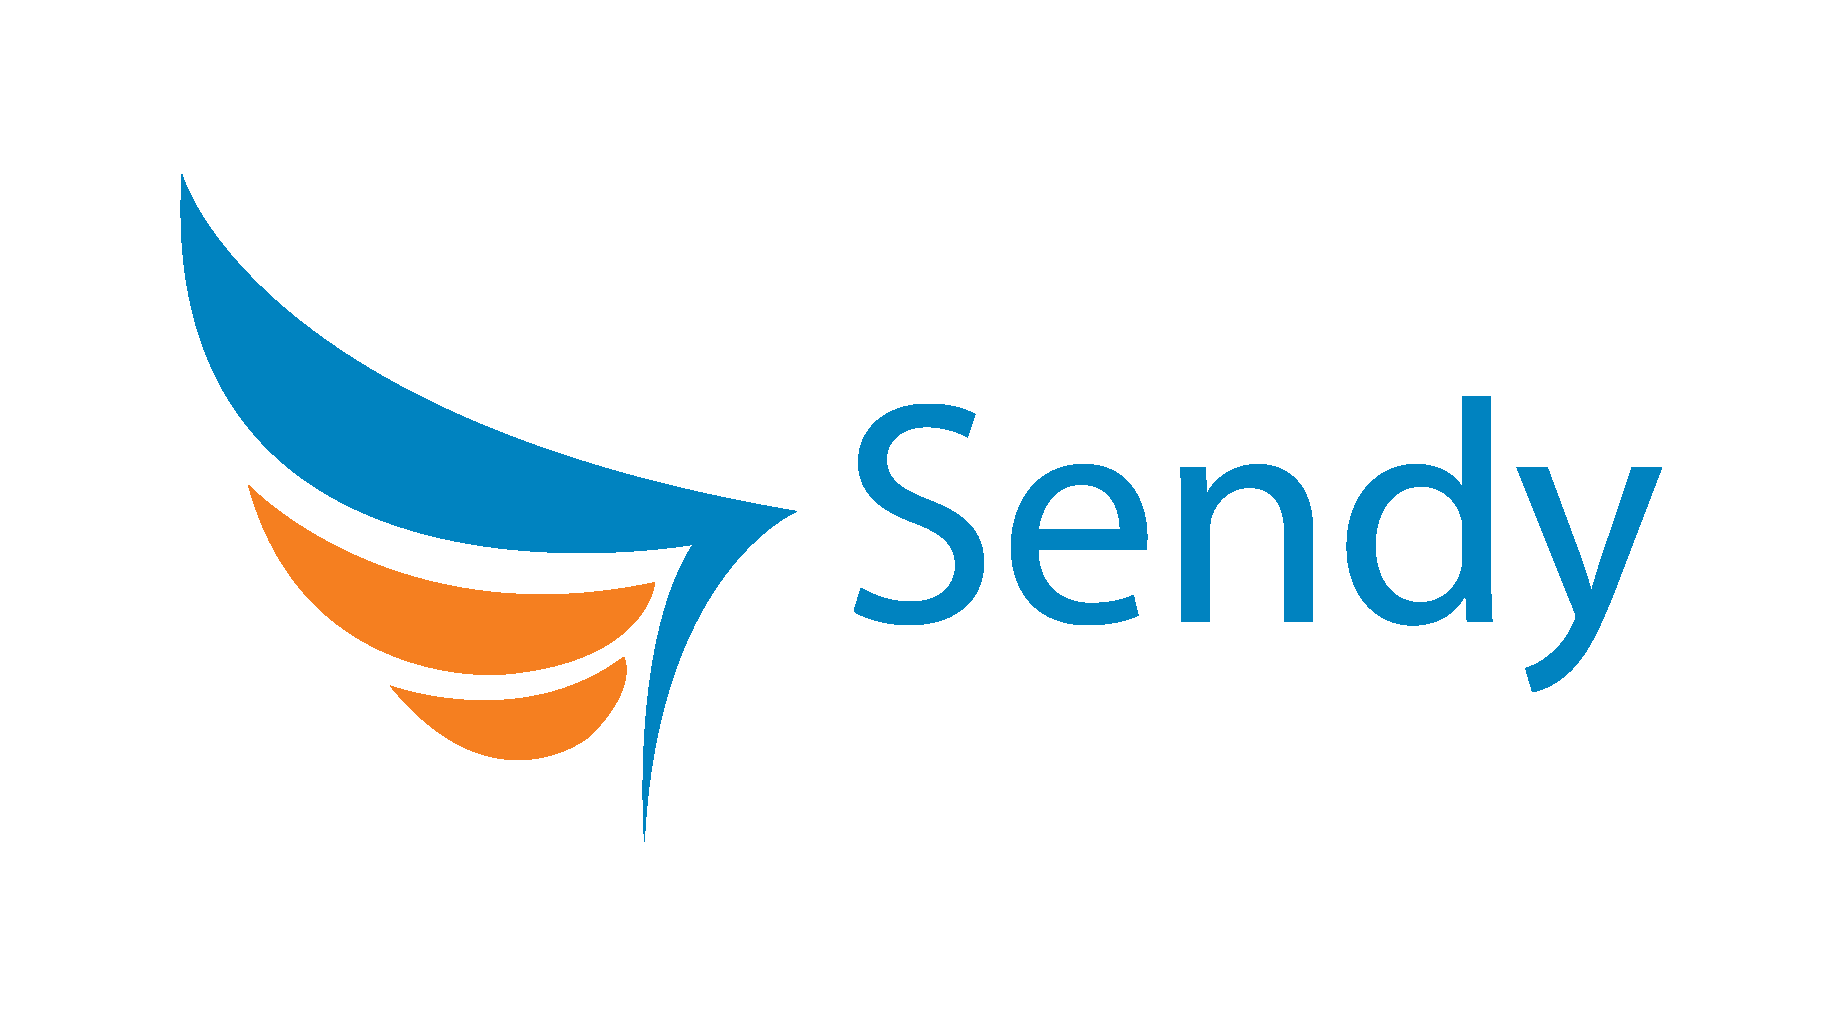 

# Importing Libraries and Modules 

In [4]:
# importing libraries and modules  

import pandas as pd 
import numpy as np
from tqdm import tqdm 
import math 
import random 

from sklearn.metrics import mean_squared_error 
from sklearn import * 
from sklearn.linear_model import * 

from tqdm import tqdm 
import math 
import random 

#visulaisation 
import matplotlib.pyplot as plt





#                                          Importing Data

In [5]:
train = pd.read_csv("train.csv")
train.columns = [ col.replace(' ', '_') for col in train.columns]
train.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [6]:
test = pd.read_csv("test.csv")
test.columns = [ col.replace(' ', '_') for col in test.columns]
test.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Pickup_-_Weekday_(Mo_=_1),Pickup_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


# Merging Dataset 

In [7]:
train.columns 


Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement_-_Day_of_Month',
       'Placement_-_Weekday_(Mo_=_1)', 'Placement_-_Time',
       'Confirmation_-_Day_of_Month', 'Confirmation_-_Weekday_(Mo_=_1)',
       'Confirmation_-_Time', 'Arrival_at_Pickup_-_Day_of_Month',
       'Arrival_at_Pickup_-_Weekday_(Mo_=_1)', 'Arrival_at_Pickup_-_Time',
       'Pickup_-_Day_of_Month', 'Pickup_-_Weekday_(Mo_=_1)', 'Pickup_-_Time',
       'Arrival_at_Destination_-_Day_of_Month',
       'Arrival_at_Destination_-_Weekday_(Mo_=_1)',
       'Arrival_at_Destination_-_Time', 'Distance_(KM)', 'Temperature',
       'Precipitation_in_millimeters', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival'],
      dtype='object')

In [8]:
test.columns 

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement_-_Day_of_Month',
       'Placement_-_Weekday_(Mo_=_1)', 'Placement_-_Time',
       'Confirmation_-_Day_of_Month', 'Confirmation_-_Weekday_(Mo_=_1)',
       'Confirmation_-_Time', 'Arrival_at_Pickup_-_Day_of_Month',
       'Arrival_at_Pickup_-_Weekday_(Mo_=_1)', 'Arrival_at_Pickup_-_Time',
       'Pickup_-_Day_of_Month', 'Pickup_-_Weekday_(Mo_=_1)', 'Pickup_-_Time',
       'Distance_(KM)', 'Temperature', 'Precipitation_in_millimeters',
       'Pickup_Lat', 'Pickup_Long', 'Destination_Lat', 'Destination_Long',
       'Rider_Id'],
      dtype='object')

In [9]:
#Align DataSet 

train = train [['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement_-_Day_of_Month',
       'Placement_-_Weekday_(Mo_=_1)', 'Placement_-_Time',
       'Confirmation_-_Day_of_Month', 'Confirmation_-_Weekday_(Mo_=_1)',
       'Confirmation_-_Time', 'Arrival_at_Pickup_-_Day_of_Month',
       'Arrival_at_Pickup_-_Weekday_(Mo_=_1)', 'Arrival_at_Pickup_-_Time',
       'Pickup_-_Day_of_Month', 'Pickup_-_Weekday_(Mo_=_1)', 'Pickup_-_Time',
       'Arrival_at_Destination_-_Day_of_Month',
       'Arrival_at_Destination_-_Weekday_(Mo_=_1)',
       'Arrival_at_Destination_-_Time', 'Distance_(KM)', 'Temperature',
       'Precipitation_in_millimeters', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival']]



In [10]:
# Join datasets together 

df=pd.concat([train, test])
df.head 
sort = False 

C:\Users\Charlene.Mncube\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
#check different types of data types 

df.dtypes 

Arrival_at_Destination_-_Day_of_Month        float64
Arrival_at_Destination_-_Time                 object
Arrival_at_Destination_-_Weekday_(Mo_=_1)    float64
Arrival_at_Pickup_-_Day_of_Month               int64
Arrival_at_Pickup_-_Time                      object
Arrival_at_Pickup_-_Weekday_(Mo_=_1)           int64
Confirmation_-_Day_of_Month                    int64
Confirmation_-_Time                           object
Confirmation_-_Weekday_(Mo_=_1)                int64
Destination_Lat                              float64
Destination_Long                             float64
Distance_(KM)                                  int64
Order_No                                      object
Personal_or_Business                          object
Pickup_-_Day_of_Month                          int64
Pickup_-_Time                                 object
Pickup_-_Weekday_(Mo_=_1)                      int64
Pickup_Lat                                   float64
Pickup_Long                                  f

# Checking Variable correlation 

In [12]:
df.corr()

,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Destination_Lat,Destination_Long,Distance_(KM),Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Pickup_Lat,Pickup_Long,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Platform_Type,Precipitation_in_millimeters,Temperature,Time_from_Pickup_to_Arrival
Arrival_at_Destination_-_Day_of_Month,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,0.007550,0.002073,-0.007587,1.000000,0.026123,-0.004923,-0.005448,0.999998,0.026132,0.012770,-0.204143,0.013099,-0.014701
Arrival_at_Destination_-_Weekday_(Mo_=_1),0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,-0.004251,-0.000900,0.003574,0.026123,1.000000,-0.000883,0.011036,0.026122,0.999952,-0.058005,-0.050592,0.031074,0.009744
Arrival_at_Pickup_-_Day_of_Month,1.000000,0.026123,1.000000,0.023891,1.000000,0.023891,0.003888,0.003049,-0.001979,1.000000,0.023891,-0.005087,0.000764,0.999999,0.023898,0.013963,-0.223946,0.008007,-0.014701
Arrival_at_Pickup_-_Weekday_(Mo_=_1),0.026123,1.000000,0.023891,1.000000,0.023891,1.000000,0.002706,-0.000934,0.009388,0.023891,1.000000,0.000241,0.010503,0.023890,0.999964,-0.058612,-0.031377,0.030179,0.009744
Confirmation_-_Day_of_Month,1.000000,0.026123,1.000000,0.023891,1.000000,0.023891,0.003888,0.003049,-0.001979,1.000000,0.023891,-0.005087,0.000764,0.999999,0.023898,0.013963,-0.223946,0.008007,-0.014701
Confirmation_-_Weekday_(Mo_=_1),0.026123,1.000000,0.023891,1.000000,0.023891,1.000000,0.002706,-0.000934,0.009388,0.023891,1.000000,0.000241,0.010503,0.023890,0.999964,-0.058612,-0.031377,0.030179,0.009744
Destination_Lat,0.007550,-0.004251,0.003888,0.002706,0.003888,0.002706,1.000000,0.044218,-0.076642,0.003888,0.002706,0.109250,0.016541,0.003882,0.002670,0.006558,0.008294,0.011653,-0.061872
Destination_Long,0.002073,-0.000900,0.003049,-0.000934,0.003049,-0.000934,0.044218,1.000000,0.145198,0.003049,-0.000934,0.051481,0.081843,0.003052,-0.000915,0.042425,0.034903,0.019175,0.070425
Distance_(KM),-0.007587,0.003574,-0.001979,0.009388,-0.001979,0.009388,-0.076642,0.145198,1.000000,-0.001979,0.009388,-0.128315,0.180356,-0.001978,0.009394,0.005981,-0.039817,-0.004892,0.580608
Pickup_-_Day_of_Month,1.000000,0.026123,1.000000,0.023891,1.000000,0.023891,0.003888,0.003049,-0.001979,1.000000,0.023891,-0.005087,0.000764,0.999999,0.023898,0.013963,-0.223946,0.008007,-0.014701


# Handling Categorical Data 

### Dropping Irrelevent Columns 

In [16]:
#drop redundant columns along with unique columns 

df_final= df.drop(['Placement_-_Weekday_(Mo_=_1)', 'Confirmation_-_Weekday_(Mo_=_1)','Arrival_at_Pickup_-_Day_of_Month',
       'Arrival_at_Pickup_-_Weekday_(Mo_=_1)', 'Pickup_-_Day_of_Month', 'Pickup_-_Weekday_(Mo_=_1)', 'Arrival_at_Destination_-_Time', 
                     'Arrival_at_Pickup_-_Time', 'Confirmation_-_Time', 'Pickup_-_Time', 'Placement_-_Time', 'Order_No', 'User_Id', 'Vehicle_Type', 'Rider_Id'], axis=1)
df_final.head()

,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Confirmation_-_Day_of_Month,Destination_Lat,Destination_Long,Distance_(KM),Personal_or_Business,Pickup_Lat,Pickup_Long,Placement_-_Day_of_Month,Platform_Type,Precipitation_in_millimeters,Temperature,Time_from_Pickup_to_Arrival
0,9.0,5.0,9,-1.300406,36.829741,4,Business,-1.317755,36.830370,9,3,NaN,20.4,745.0
1,12.0,5.0,12,-1.295004,36.814358,16,Personal,-1.351453,36.899315,12,3,NaN,26.4,1993.0
2,30.0,2.0,30,-1.300921,36.828195,3,Business,-1.308284,36.843419,30,3,NaN,NaN,455.0
3,15.0,5.0,15,-1.257147,36.795063,9,Business,-1.281301,36.832396,15,3,NaN,19.2,1341.0
4,13.0,1.0,13,-1.295041,36.809817,9,Personal,-1.266597,36.792118,13,1,NaN,15.4,1214.0


In [17]:
df_final.dtypes 

Arrival_at_Destination_-_Day_of_Month        float64
Arrival_at_Destination_-_Weekday_(Mo_=_1)    float64
Confirmation_-_Day_of_Month                    int64
Destination_Lat                              float64
Destination_Long                             float64
Distance_(KM)                                  int64
Personal_or_Business                          object
Pickup_Lat                                   float64
Pickup_Long                                  float64
Placement_-_Day_of_Month                       int64
Platform_Type                                  int64
Precipitation_in_millimeters                 float64
Temperature                                  float64
Time_from_Pickup_to_Arrival                  float64
dtype: object

### Taking care of missing data 

In [18]:
df_final.head()

,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Confirmation_-_Day_of_Month,Destination_Lat,Destination_Long,Distance_(KM),Personal_or_Business,Pickup_Lat,Pickup_Long,Placement_-_Day_of_Month,Platform_Type,Precipitation_in_millimeters,Temperature,Time_from_Pickup_to_Arrival
0,9.0,5.0,9,-1.300406,36.829741,4,Business,-1.317755,36.830370,9,3,NaN,20.4,745.0
1,12.0,5.0,12,-1.295004,36.814358,16,Personal,-1.351453,36.899315,12,3,NaN,26.4,1993.0
2,30.0,2.0,30,-1.300921,36.828195,3,Business,-1.308284,36.843419,30,3,NaN,NaN,455.0
3,15.0,5.0,15,-1.257147,36.795063,9,Business,-1.281301,36.832396,15,3,NaN,19.2,1341.0
4,13.0,1.0,13,-1.295041,36.809817,9,Personal,-1.266597,36.792118,13,1,NaN,15.4,1214.0


In [19]:
#converting catergorical variables  

df_final = pd.get_dummies(df_final)
df_final.head()



,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Confirmation_-_Day_of_Month,Destination_Lat,Destination_Long,Distance_(KM),Pickup_Lat,Pickup_Long,Placement_-_Day_of_Month,Platform_Type,Precipitation_in_millimeters,Temperature,Time_from_Pickup_to_Arrival,Personal_or_Business_Business,Personal_or_Business_Personal
0,9.0,5.0,9,-1.300406,36.829741,4,-1.317755,36.830370,9,3,NaN,20.4,745.0,1,0
1,12.0,5.0,12,-1.295004,36.814358,16,-1.351453,36.899315,12,3,NaN,26.4,1993.0,0,1
2,30.0,2.0,30,-1.300921,36.828195,3,-1.308284,36.843419,30,3,NaN,NaN,455.0,1,0
3,15.0,5.0,15,-1.257147,36.795063,9,-1.281301,36.832396,15,3,NaN,19.2,1341.0,1,0
4,13.0,1.0,13,-1.295041,36.809817,9,-1.266597,36.792118,13,1,NaN,15.4,1214.0,0,1


In [20]:
df_final.dtypes

Arrival_at_Destination_-_Day_of_Month        float64
Arrival_at_Destination_-_Weekday_(Mo_=_1)    float64
Confirmation_-_Day_of_Month                    int64
Destination_Lat                              float64
Destination_Long                             float64
Distance_(KM)                                  int64
Pickup_Lat                                   float64
Pickup_Long                                  float64
Placement_-_Day_of_Month                       int64
Platform_Type                                  int64
Precipitation_in_millimeters                 float64
Temperature                                  float64
Time_from_Pickup_to_Arrival                  float64
Personal_or_Business_Business                  uint8
Personal_or_Business_Personal                  uint8
dtype: object

In [21]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df_final.iloc[ : , :])
df_final.iloc[:, :] =  imputer.transform(df_final.iloc[: , :])



In [22]:
df_final

,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Confirmation_-_Day_of_Month,Destination_Lat,Destination_Long,Distance_(KM),Pickup_Lat,Pickup_Long,Placement_-_Day_of_Month,Platform_Type,Precipitation_in_millimeters,Temperature,Time_from_Pickup_to_Arrival,Personal_or_Business_Business,Personal_or_Business_Personal
0,9.000000,5.000000,9.0,-1.300406,36.829741,4.0,-1.317755,36.830370,9.0,3.0,7.573502,20.400000,745.000000,1.0,0.0
1,12.000000,5.000000,12.0,-1.295004,36.814358,16.0,-1.351453,36.899315,12.0,3.0,7.573502,26.400000,1993.000000,0.0,1.0
2,30.000000,2.000000,30.0,-1.300921,36.828195,3.0,-1.308284,36.843419,30.0,3.0,7.573502,23.255689,455.000000,1.0,0.0
3,15.000000,5.000000,15.0,-1.257147,36.795063,9.0,-1.281301,36.832396,15.0,3.0,7.573502,19.200000,1341.000000,1.0,0.0
4,13.000000,1.000000,13.0,-1.295041,36.809817,9.0,-1.266597,36.792118,13.0,1.0,7.573502,15.400000,1214.000000,0.0,1.0
5,14.000000,5.000000,14.0,-1.257309,36.806008,9.0,-1.302583,36.767081,14.0,3.0,7.573502,27.200000,3191.000000,1.0,0.0
6,9.000000,5.000000,9.0,-1.276574,36.851365,5.0,-1.279395,36.825364,9.0,3.0,7.573502,20.300000,1380.000000,1.0,0.0
7,11.000000,1.000000,11.0,-1.255189,36.782203,3.0,-1.252796,36.800313,11.0,3.0,7.573502,28.700000,646.000000,1.0,0.0
8,30.000000,2.000000,30.0,-1.300255,36.825657,9.0,-1.255189,36.782203,30.0,3.0,7.573502,23.255689,3398.000000,1.0,0.0
9,23.000000,5.000000,23.0,-1.215601,36.891686,14.0,-1.225322,36.808550,23.0,3.0,7.573502,24.600000,3439.000000,1.0,0.0


# Splitting the Train and Test Dataset 

In [23]:
from sklearn.model_selection import train_test_split 

y = df_final [:len(train)][['Time_from_Pickup_to_Arrival']]
X_train = df_final [:len(train)].drop('Time_from_Pickup_to_Arrival',axis = 1)
X_test = df_final [:len(train)].drop ('Time_from_Pickup_to_Arrival',axis = 1)
X = df_final [:len(train)].drop ('Time_from_Pickup_to_Arrival',axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 6) 

In [26]:
X_train.head()

,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Confirmation_-_Day_of_Month,Destination_Lat,Destination_Long,Distance_(KM),Pickup_Lat,Pickup_Long,Placement_-_Day_of_Month,Platform_Type,Precipitation_in_millimeters,Temperature,Personal_or_Business_Business,Personal_or_Business_Personal
18197,5.0,3.0,5.0,-1.255189,36.782203,3.0,-1.258414,36.804800,5.0,3.0,7.573502,22.400000,1.0,0.0
2889,16.0,3.0,16.0,-1.263349,36.795970,8.0,-1.308101,36.839635,16.0,3.0,7.573502,25.700000,1.0,0.0
10748,15.0,1.0,15.0,-1.252796,36.800313,5.0,-1.279395,36.825364,15.0,3.0,7.573502,23.255689,1.0,0.0
11631,28.0,4.0,28.0,-1.300406,36.829741,9.0,-1.263818,36.793006,28.0,3.0,7.573502,22.300000,1.0,0.0
7066,18.0,1.0,18.0,-1.355909,36.910045,15.0,-1.307787,36.844321,18.0,3.0,7.573502,30.700000,1.0,0.0


In [27]:
X_test.head()

,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Confirmation_-_Day_of_Month,Destination_Lat,Destination_Long,Distance_(KM),Pickup_Lat,Pickup_Long,Placement_-_Day_of_Month,Platform_Type,Precipitation_in_millimeters,Temperature,Personal_or_Business_Business,Personal_or_Business_Personal
20961,22.0,4.0,22.0,-1.289446,36.778095,5.0,-1.270132,36.782444,22.0,3.0,7.573502,20.600000,1.0,0.0
14706,22.0,1.0,22.0,-1.261433,36.809436,5.0,-1.289197,36.822528,22.0,3.0,7.573502,26.400000,1.0,0.0
2806,7.0,2.0,7.0,-1.262967,36.806837,7.0,-1.276349,36.767178,7.0,3.0,7.573502,23.255689,1.0,0.0
4758,18.0,1.0,18.0,-1.277071,36.823109,11.0,-1.299144,36.752880,18.0,3.0,7.573502,27.900000,1.0,0.0
6965,6.0,4.0,6.0,-1.262864,36.807040,1.0,-1.265228,36.802016,6.0,3.0,7.573502,19.500000,1.0,0.0


# Feature Scaling 

In [28]:
#standardising our variables 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train test split
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=6)



In [29]:
X_train

array([[ 2.66649454e-01, -1.42945182e+00,  2.66649454e-01, ...,
        -7.88814987e-04,  4.68582671e-01, -4.68582671e-01],
       [-1.09719166e+00,  4.84800715e-01, -1.09719166e+00, ...,
         2.30225323e-01,  4.68582671e-01, -4.68582671e-01],
       [ 3.80302881e-01,  1.12288489e+00,  3.80302881e-01, ...,
        -1.01126654e+00, -2.13409514e+00,  2.13409514e+00],
       ...,
       [ 7.21263160e-01,  1.12288489e+00,  7.21263160e-01, ...,
        -2.66371422e-01,  4.68582671e-01, -4.68582671e-01],
       [ 7.21263160e-01, -7.91367643e-01,  7.21263160e-01, ...,
        -1.22852761e+00,  4.68582671e-01, -4.68582671e-01],
       [ 6.07609733e-01,  2.39905325e+00,  6.07609733e-01, ...,
         1.22341881e+00, -2.13409514e+00,  2.13409514e+00]])

In [30]:
X_test

array([[ 7.21263160e-01,  4.84800715e-01,  7.21263160e-01, ...,
        -8.25042760e-01,  4.68582671e-01, -4.68582671e-01],
       [ 7.21263160e-01, -1.42945182e+00,  7.21263160e-01, ...,
         9.75120440e-01,  4.68582671e-01, -4.68582671e-01],
       [-9.83538236e-01, -7.91367643e-01, -9.83538236e-01, ...,
        -7.88814987e-04,  4.68582671e-01, -4.68582671e-01],
       ...,
       [-9.83538236e-01,  1.12288489e+00, -9.83538236e-01, ...,
         6.02672881e-01,  4.68582671e-01, -4.68582671e-01],
       [ 4.93956307e-01,  4.84800715e-01,  4.93956307e-01, ...,
         5.40598288e-01,  4.68582671e-01, -4.68582671e-01],
       [ 3.80302881e-01, -7.91367643e-01,  3.80302881e-01, ...,
         2.06142582e+00,  4.68582671e-01, -4.68582671e-01]])

# Random Forest Forecasting  

### Fitting the Model

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 5 in this example

RF = RandomForestRegressor(n_estimators=100, max_depth=5)
RF.fit(X_train,y_train)

C:\Users\Charlene.Mncube\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

# Evaluating Model Performance 

### Predicting the Model Result 

In [33]:
from sklearn.metrics import mean_squared_error

# Get predictions
y_pred = RF.predict(X_test)



In [34]:
def rmse(y_test,y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [35]:
rmse(y_test, y_pred) 

761.917140464994

In [36]:
#goodness of fit 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.39025113301412484

# Visualising 

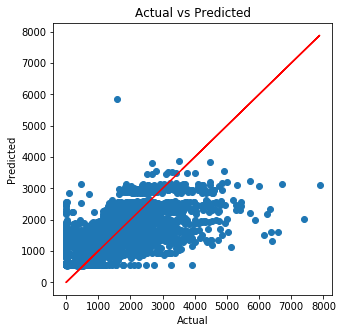

In [37]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,y_pred)
ax.plot(y_test,y_test,'r')
plt.show()

# Making the submission 

In [38]:
X_train = df_final [:len(train)].drop('Time_from_Pickup_to_Arrival',axis = 1)
X_test = df_final [:len(train)].drop ('Time_from_Pickup_to_Arrival',axis = 1)


In [39]:
RF.fit(X_train, y.values.ravel())
y_pred = RF.predict(X_test)

In [40]:
#placing results in csv file format 

daf=pd.DataFrame(y_pred, columns = ['Time_from_Pickup_to_Arrival'])
daf.head()

,Time_from_Pickup_to_Arrival
0,586.947271
1,2401.735572
2,600.826590
3,1552.225826
4,1656.078150


In [41]:
#draw both dataframes together 

output = pd.DataFrame({"Order No":test['Order_No']})
submission = output.join(daf)
submission.to_csv('Charlene_Mncube_Submission_New_Method.csv', index=False)

In [42]:
submission.head(100)

,Order No,Time_from_Pickup_to_Arrival
0,Order_No_19248,586.947271
1,Order_No_12736,2401.735572
2,Order_No_768,600.826590
3,Order_No_15332,1552.225826
4,Order_No_21373,1656.078150
5,Order_No_14573,1557.507864
6,Order_No_6731,1150.656540
7,Order_No_18436,844.898820
8,Order_No_2288,1664.248265
9,Order_No_9063,1918.374881
